
Tässä on tavoitteena tutkia eri lajien välistä kilpailua ja niiden differentiaali yhtälöitä. Sekä varsinkin Lotka Volterra mallia.


# Lotka Volterra malli


Lopulta kokeillaan lisätä erilaisia muuttujia yhtälöön, sekä vaihtaa "Predator prey" malliin, joissa on myös mukana satunnaisuus ja metsästys.

___


$\frac{dN_{i}}{dt} = r_{i}N_{i} (\frac{K_{i} - N_{i} - \sum_{j \neq i}^{n} \alpha_{ij}N_{j}}{K_{i}})  (1)$

- N= population size of i,j
- r= Growth rate of population i
- K= Carrying capacity of population i
- αij = Competition effect of population j on population i
___
Joka on yksinkertaistettu muotoon:

$\frac{dN_{1}}{dt} = r_{1}N_{1}(1 - \frac{ [N_{1} + \alpha N_{2}]}{K_{1}}) (2)$

$\frac{dN_{2}}{dt} = r_{2}N_{2}(1 - \frac{[N_{2} + \beta N_{1}]}{K_{2}}) (3)$


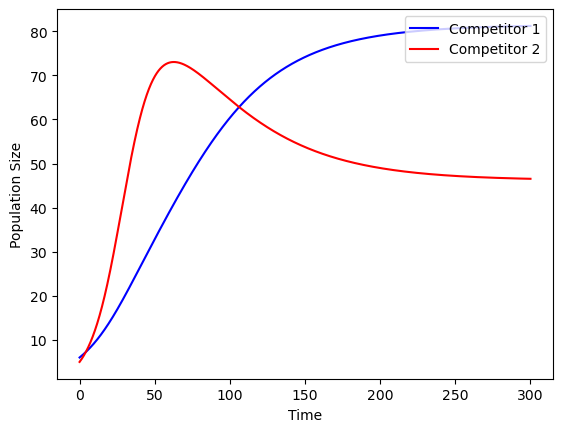

In [1]:
import numpy as np                   
import matplotlib.pyplot as plt      
import scipy as sci                  
from scipy import integrate


#2. Creating the model function
def LVC(N, t, r1, r2, alpha, beta, K1, K2):
    """Lotka-Volterra Competition model"""
    dN_1 = r1*N[0] * (1 - (N[0] + alpha * N[1])/ K1)
    dN_2 = r2*N[1] * (1 - (N[1] + beta * N[0])/ K2)
    return(np.array([dN_1, dN_2]))

#3. Set up initial conditions and parameters
r1 = 0.05 
r2 = 0.1
alpha = 0.4
beta = 0.66
K1 = 100
K2 = 100

NI = np.array([6, 5]) # This is a temporary variable which store N1 and N2 values

#4. Time vector
t = np.linspace(0, 300, 3000)

#5. Solving the ODE
sol = sci.integrate.odeint(LVC, NI, t, args=(r1, r2, alpha, beta, K1, K2))

#6 Creating the graph
plt.plot(t, sol[:, 0], color = "blue", label = "Competitor 1")
plt.plot(t, sol[:, 1], color = "red", label = "Competitor 2")
plt.legend(loc = "upper right")
plt.xlabel("Time")
plt.ylabel("Population Size")
plt.show()

## 3 lajin malli

Tässä on hieman muokattu mallia 3 eri lajille.

Eli suurin muutos, mitä mallissa tapahtuu, on 3. lajin lisääminen. Joten laskutoimitus vain pitkittyy, eikä ole sen monimutkaisempi. Eikä nyt kauheasti mielenkiintoisempi.

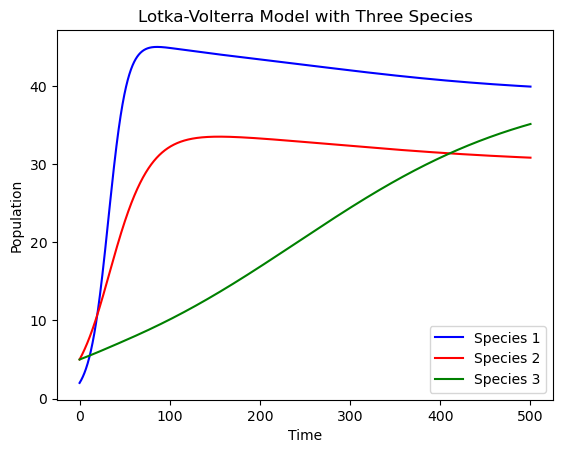

N1: 39.96179050728595 N2: 30.855988855899184 N3: 35.17020597963061


In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ODE system
def lotka_volterra_3species(N, t, r1, r2, r3, K1, K2, K3, alpha12, alpha13, beta21, beta23, gamma31, gamma32):
    N1, N2, N3 = N
    dN1_dt = r1 * N1 * (1 - (N1 + alpha12 * N2 + alpha13 * N3) / K1)
    dN2_dt = r2 * N2 * (1 - (N2 + beta21 * N1 + beta23 * N3) / K2)
    dN3_dt = r3 * N3 * (1 - (N3 + gamma31 * N1 + gamma32 * N2) / K3)
    return [dN1_dt, dN2_dt, dN3_dt]

# Initial conditions
N0 = [2, 5, 5]  # Initial populations of species 1, 2, and 3

# Time
t = np.linspace(0, 500,num=5000)

# Params
r1, r2, r3 = 0.1, 0.05, 0.01  # Growth rates
K1, K2, K3 = 50, 40, 50      # Carrying capacities
alpha12, alpha13 = 0.1, 0.2  # Competition coefficients for species 1
beta21, beta23 = 0.1, 0.15    # Competition coefficients for species 2
gamma31, gamma32 = 0.1, 0.2  # Competition coefficients for species 3

# Solve
sol = odeint(lotka_volterra_3species, N0, t, args=(r1, r2, r3, K1, K2, K3, alpha12, alpha13, beta21, beta23, gamma31, gamma32))

N1, N2, N3 = sol.T
plt.plot(t, N1, 'b-', label='Species 1')
plt.plot(t, N2, 'r-', label='Species 2')
plt.plot(t, N3, 'g-', label='Species 3')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc='best')
plt.title('Lotka-Volterra Model with Three Species')
plt.show()
print(f"N1: {N1[-1]} N2: {N2[-1]} N3: {N3[-1]}")

### 3 lajin malli, yhteinen kantokyky.

Eli tässä on vain laitettu yhteinen kantokyky koko populaatiolle. Ja katsotaan, miten se muokkautuu. Toki on oletettavaa, että se jolla on suurin growth rate, on dominoiva laji.

Eli mallia pitää hieman muuttaa.

Yksinkertainen tapahan olisi tehdä vain näin.

```
    dN1_dt = r1 * N1 * (1 - (N1 + alpha12 * N2 + alpha13 * N3) / (K - N1 - N2 - N3))
    dN2_dt = r2 * N2 * (1 - (N2 + beta21 * N1 + beta23 * N3) / (K - N1 - N2 - N3))
    dN3_dt = r3 * N3 * (1 - (N3 + gamma31 * N1 + gamma32 * N2) / (K - N1 - N2 - N3))
```

Mutta tämä on ehkä hieman kauakana tosielämästä. Sillä tämän avulla, jokainen laji elää ajankanssa ns sovussa keskenään, eikä yksikään laji kuole sukupuuttoon. 

Kuten kuvaajasta nähdään.

Mutta sitä voi olla hankala soveltaa tähän malliin, sillä kuolemaa ei ole mukana.

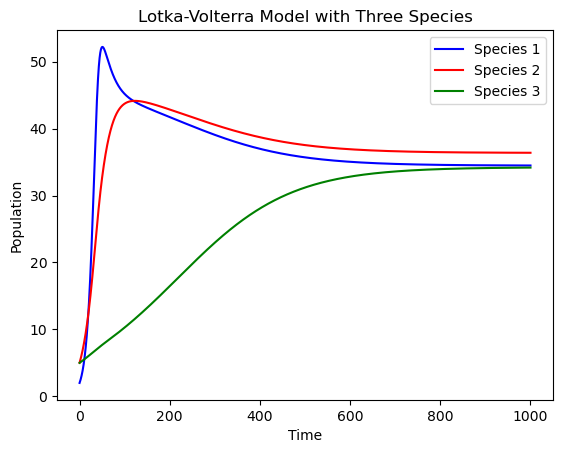

N1: 34.485675622942615 N2: 36.386267607641706 N3: 34.17176701174149


In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ODE system
def lotka_volterra_3species(N, t, r1, r2, r3, K, alpha12, alpha13, beta21, beta23, gamma31, gamma32):
    N1, N2, N3 = N
    dN1_dt = r1 * N1 * (1 - (N1 + alpha12 * N2 + alpha13 * N3) / (K - N1 - N2 - N3))
    dN2_dt = r2 * N2 * (1 - (N2 + beta21 * N1 + beta23 * N3) / (K - N1 - N2 - N3))
    dN3_dt = r3 * N3 * (1 - (N3 + gamma31 * N1 + gamma32 * N2) / (K - N1 - N2 - N3))
    return [dN1_dt, dN2_dt, dN3_dt]

# Initial conditions
N0 = [2, 5, 5]  # Initial populations of species 1, 2, and 3

# Time
t = np.linspace(0, 1000, 10000)

# Params
K = 150 # Common carrying capacity
r1, r2, r3 = 0.1, 0.05, 0.01  # Growth rates
K1, K2, K3 = 50, 40, 50      # Carrying capacities
alpha12, alpha13 = 0.1, 0.2  # Competition coefficients for species 1
beta21, beta23 = 0.1, 0.15    # Competition coefficients for species 2
gamma31, gamma32 = 0.1, 0.2  # Competition coefficients for species 3

# Solve
sol = odeint(lotka_volterra_3species, N0, t, args=(r1, r2, r3, K, alpha12, alpha13, beta21, beta23, gamma31, gamma32))

N1, N2, N3 = sol.T
plt.plot(t, N1, 'b-', label='Species 1')
plt.plot(t, N2, 'r-', label='Species 2')
plt.plot(t, N3, 'g-', label='Species 3')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc='best')
plt.title('Lotka-Volterra Model with Three Species')
plt.show()
print(f"N1: {N1[-1]} N2: {N2[-1]} N3: {N3[-1]}")

### 3 lajin Lotka Volterra, kuolema ja yhteinen kantokyky lisättynä.

Eli malliin täytyy lisätä nyt kuolleisuus. Voitaisiin ajatella, että mitä nopeampi "growth rate", sitä nopeammin laji on sukukypsä, sekä sitä nuorempana kuolee pois.

Miettin esimerkiksi hiiriä, jäniksiä ja hirveä. Hiiren elinikä 2-5 kk, jänis 1-2 vuotta ja hirven 7 - 15 vuotta.

Hiiren sukukypsyys 4 - 5 viikon iässä, jänis sukukypsyys 1 vuotiaana, hirvi sukukypsyys, 1.5 - 2.5 vuotiaana.

Näihin toki myös vaikuttaa poikuieden tekeminen ja poikuieden koko, mutta niitä ei oteta tässä vielä mukaan. Eikä myöskään kokoeroja.

Vaikka osittain growth ratea voitaisiin kuvitella myös death ratena, lisätään se silti, sekä tutkitaan miten tämä vaikuttaa.

Eli muutokset:
```
def lotka_volterra_3species(N, t, r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32):
    N1, N2, N3 = N
    dN1_dt = r1 * N1 * (1 - (N1 + alpha12 * N2 + alpha13 * N3) / (K - N1 - N2 - N3)) - d1 * N1
    dN2_dt = r2 * N2 * (1 - (N2 + beta21 * N1 + beta23 * N3) / (K - N1 - N2 - N3)) - d2 * N2
    dN3_dt = r3 * N3 * (1 - (N3 + gamma31 * N1 + gamma32 * N2) / (K - N1 - N2 - N3)) - d3 * N3
    return [dN1_dt, dN2_dt, dN3_dt]
```

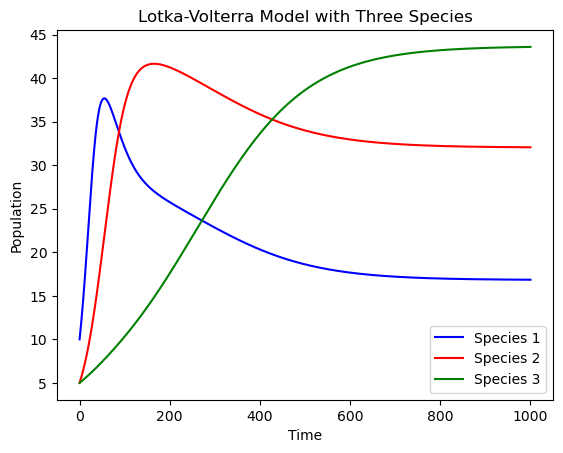

N1: 16.847726383442943 N2: 32.05440256082629 N3: 43.576323542323856


In [4]:
# Lisätään death rate, d1, d2, d3

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ODE system
def lotka_volterra_3species(N, t, r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32):
    N1, N2, N3 = N
    dN1_dt = r1 * N1 * (1 - (N1 + alpha12 * N2 + alpha13 * N3) / (K - N1 - N2 - N3)) - d1 * N1
    dN2_dt = r2 * N2 * (1 - (N2 + beta21 * N1 + beta23 * N3) / (K - N1 - N2 - N3)) - d2 * N2
    dN3_dt = r3 * N3 * (1 - (N3 + gamma31 * N1 + gamma32 * N2) / (K - N1 - N2 - N3)) - d3 * N3
    return [dN1_dt, dN2_dt, dN3_dt]

# Initial conditions
N0 = [10, 5, 5]  # Initial populations of species 1, 2, and 3

# Time
t = np.linspace(0, 1000, 10000)

# Params
K = 150 # Common carrying capacity
r1, r2, r3 = 0.12, 0.05, 0.01  # Growth rates
d1, d2, d3 = 0.06,0.015,0.001 # Death rates
K1, K2, K3 = 50, 40, 50      # Carrying capacities
alpha12, alpha13 = 0.1, 0.2  # Competition coefficients for species 1
beta21, beta23 = 0.1, 0.15    # Competition coefficients for species 2
gamma31, gamma32 = 0.1, 0.2  # Competition coefficients for species 3

# Solve
sol = odeint(lotka_volterra_3species, N0, t, args=(r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32))

N1, N2, N3 = sol.T
plt.plot(t, N1, 'b-', label='Species 1')
plt.plot(t, N2, 'r-', label='Species 2')
plt.plot(t, N3, 'g-', label='Species 3')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc='best')
plt.title('Lotka-Volterra Model with Three Species')
plt.show()
print(f"N1: {N1[-1]} N2: {N2[-1]} N3: {N3[-1]}")

Näitä tuloksia voisi pitää jokseenkin totuuden mukaisina. Kun mietitään esimerkiksi evoluutiota, sekä syytä miksi jotkut eläimet pystyvät lisääntymään jopa 5-6 kertaa vuodessa, kuten hiiret.

Toki oletettavasti näihin myös vaikuttaa koko, mutta sitten taas, miksi esimerkiksi hiiriä on?

Hiiret kuitenki ovat saalis monelle eri petoeläimelle. Ja miten tämä laji selviytyy? Yksi keino voisi olla esimerkiksi tehokas lisääntyminen.

Toki tästäkin mallista puuttuu paljon osia, jotka vaikuttavat elämään. Esimerkiksi growth ratelle voisi olla yksi yhteinen tekiä, ravinto.

Tämäkin toki on tässä tavallaan kantokykynä, mutta mitä jos lisätään petoeläimiä?

## Metsästys ja lajit

Kokeillaan seuraavaksi lisätä kausittainen metsästys. Eli metsästyskausi voisi alkaa aina vuoden 250 pvä. Ja kestää sen 60 päivää.

Jotenka täytyy muuttaa algrotmin ratkaisutapaa `sol = odeint`. Vaihdetaan se siis itse koodatuksi eulerin tavaksi, jotta voidaan lisätä ehtoja metsästykselle. Nimetään myös lajit, olkoon ne nyt jänis, kauris ja hirvi, nämä siis vain visualisoinnin kannalta.

N1 = Kauris

N2 = Jänis

N3 = Hirvi

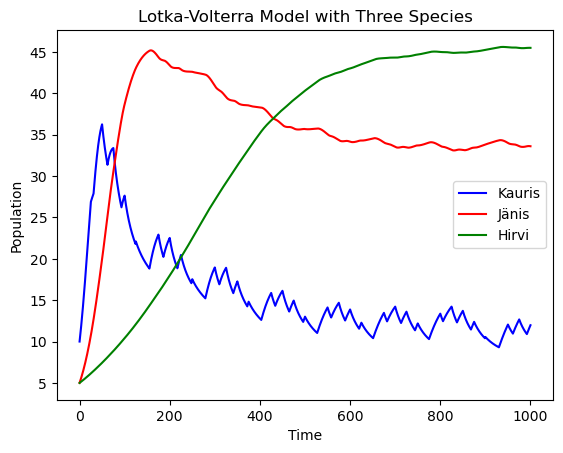

Kauriit: 11.973556372981376 Jänikset: 33.60310384935011 Hirvet: 45.49328688654856


In [5]:
# Lisätään uusi metodi "lotka_volterra_3species_hunt" ja vaihetaan ratkaisu itse koodatuksi eulerin metodiksi

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ODE system
def lotka_volterra_3species_hunt(N, r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32):
    h1 = 0.02 # Hunting rates
    N1, N2, N3 = N
    dN1_dt = r1 * N1 * (1 - (N1 + alpha12 * N2 + alpha13 * N3) / (K - N1 - N2 - N3)) - d1 * N1 - h1 * N1
    dN2_dt = r2 * N2 * (1 - (N2 + beta21 * N1 + beta23 * N3) / (K - N1 - N2 - N3)) - d2 * N2
    dN3_dt = r3 * N3 * (1 - (N3 + gamma31 * N1 + gamma32 * N2) / (K - N1 - N2 - N3)) - d3 * N3
    return [dN1_dt, dN2_dt, dN3_dt]


def lotka_volterra_3species(N, r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32):
    N1, N2, N3 = N
    dN1_dt = r1 * N1 * (1 - (N1 + alpha12 * N2 + alpha13 * N3) / (K - N1 - N2 - N3)) - d1 * N1
    dN2_dt = r2 * N2 * (1 - (N2 + beta21 * N1 + beta23 * N3) / (K - N1 - N2 - N3)) - d2 * N2
    dN3_dt = r3 * N3 * (1 - (N3 + gamma31 * N1 + gamma32 * N2) / (K - N1 - N2 - N3)) - d3 * N3
    return [dN1_dt, dN2_dt, dN3_dt]

# Initial conditions
N1 = [10]
N2 = [5]
N3 = [5]

# Time
t = np.linspace(0, 1000, 10000)

# Params
K = 150 # Common carrying capacity
r1, r2, r3 = 0.12, 0.05, 0.01  # Growth rates
d1, d2, d3 = 0.06,0.015,0.001 # Death rates
K1, K2, K3 = 50, 40, 50      # Carrying capacities
alpha12, alpha13 = 0.1, 0.2  # Competition coefficients for species 1
beta21, beta23 = 0.1, 0.15    # Competition coefficients for species 2
gamma31, gamma32 = 0.1, 0.2  # Competition coefficients for species 3

# Solve
#sol = odeint(lotka_volterra_3species, N0, t, args=(r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32))
h = 0.1 # accuracy for euler
hunt_mode = False
for index in range(1,len(t)):
    
    
    x1,x2,x3 = N1[index-1],N2[index-1],N3[index-1]
    # Määritellään metsästys ajat
    if (index % 250 == 0):
        hunt_mode = True
    if (index % 310 == 0):
        hunt_mode = False
        
    if hunt_mode:
        xn1,xn2,xn3 = lotka_volterra_3species_hunt([x1,x2,x3], r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32)
    else:
        xn1,xn2,xn3 = lotka_volterra_3species([x1,x2,x3], r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32)


    
    # evaluate the next value of x and y using differentials
    next_N1 = N1[index-1] + xn1 * h
    next_N2 = N2[index-1] + xn2 * h
    next_N3 = N3[index-1] + xn3 * h

    N1.append(next_N1)
    N2.append(next_N2)
    N3.append(next_N3)

#N1, N2, N3 = sol.T
plt.plot(t, N1, 'b-', label='Kauris')
plt.plot(t, N2, 'r-', label='Jänis')
plt.plot(t, N3, 'g-', label='Hirvi')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc='best')
plt.title('Lotka-Volterra Model with Three Species')
plt.show()
print(f"Kauriit: {N1[-1]} Jänikset: {N2[-1]} Hirvet: {N3[-1]}")

Huomataan, että metsästys on tietenkin vaikuttanut kauriisiin, sekä myös muihin lajeihin.

Kauriit vähentyneet, sekä muut lajit lisääntyneet. Lisätään seuraavaksi metsästys muillekkin lajeille. Ja katsotaan mitä tapahtuu.

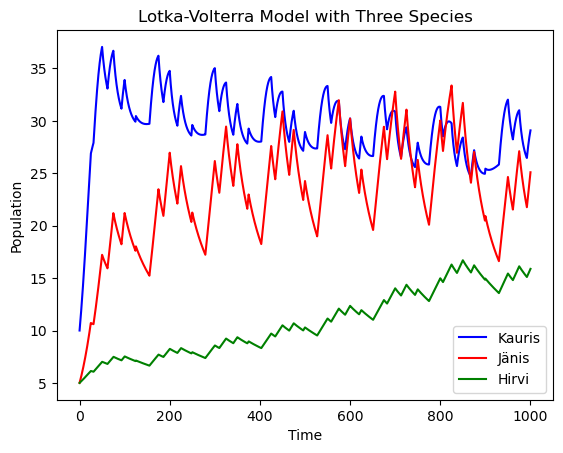

Kauriit: 29.090708093815362 Jänikset: 25.09497955954743 Hirvet: 15.878322528662975


In [6]:
# Lisätään hunting ratet muillekin lajeille.

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ODE system
def lotka_volterra_3species_hunt(N, r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32):
    h1,h2,h3 = 0.02,0.03,0.01 # Hunting rates
    N1, N2, N3 = N
    dN1_dt = r1 * N1 * (1 - (N1 + alpha12 * N2 + alpha13 * N3) / (K - N1 - N2 - N3)) - d1 * N1 - h1 * N1
    dN2_dt = r2 * N2 * (1 - (N2 + beta21 * N1 + beta23 * N3) / (K - N1 - N2 - N3)) - d2 * N2 - h2 * N2
    dN3_dt = r3 * N3 * (1 - (N3 + gamma31 * N1 + gamma32 * N2) / (K - N1 - N2 - N3)) - d3 * N3 - h3 * N3
    return [dN1_dt, dN2_dt, dN3_dt]


def lotka_volterra_3species(N, r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32):
    N1, N2, N3 = N
    dN1_dt = r1 * N1 * (1 - (N1 + alpha12 * N2 + alpha13 * N3) / (K - N1 - N2 - N3)) - d1 * N1
    dN2_dt = r2 * N2 * (1 - (N2 + beta21 * N1 + beta23 * N3) / (K - N1 - N2 - N3)) - d2 * N2
    dN3_dt = r3 * N3 * (1 - (N3 + gamma31 * N1 + gamma32 * N2) / (K - N1 - N2 - N3)) - d3 * N3
    return [dN1_dt, dN2_dt, dN3_dt]

# Initial conditions
N1 = [10]
N2 = [5]
N3 = [5]

# Time
t = np.linspace(0, 1000, 10000)

# Params
K = 150 # Common carrying capacity
r1, r2, r3 = 0.12, 0.05, 0.01  # Growth rates
d1, d2, d3 = 0.06,0.015,0.001 # Death rates
K1, K2, K3 = 50, 40, 50      # Carrying capacities
alpha12, alpha13 = 0.1, 0.2  # Competition coefficients for species 1
beta21, beta23 = 0.1, 0.15    # Competition coefficients for species 2
gamma31, gamma32 = 0.1, 0.2  # Competition coefficients for species 3

# Solve
#sol = odeint(lotka_volterra_3species, N0, t, args=(r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32))
h = 0.1 # accuracy for euler
hunt_mode = False
for index in range(1,len(t)):
    
    
    x1,x2,x3 = N1[index-1],N2[index-1],N3[index-1]
    # Määritellään metsästys ajat
    if (index % 250 == 0):
        hunt_mode = True
    if (index % 310 == 0):
        hunt_mode = False
        
    if hunt_mode:
        xn1,xn2,xn3 = lotka_volterra_3species_hunt([x1,x2,x3], r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32)
    else:
        xn1,xn2,xn3 = lotka_volterra_3species([x1,x2,x3], r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32)


    
    # evaluate the next value of x and y using differentials
    next_N1 = N1[index-1] + xn1 * h
    next_N2 = N2[index-1] + xn2 * h
    next_N3 = N3[index-1] + xn3 * h

    N1.append(next_N1)
    N2.append(next_N2)
    N3.append(next_N3)

#N1, N2, N3 = sol.T
plt.plot(t, N1, 'b-', label='Kauris')
plt.plot(t, N2, 'r-', label='Jänis')
plt.plot(t, N3, 'g-', label='Hirvi')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc='best')
plt.title('Lotka-Volterra Model with Three Species')
plt.show()
print(f"Kauriit: {N1[-1]} Jänikset: {N2[-1]} Hirvet: {N3[-1]}")

Näitä 'hunting rate' arvoja muuttamalla, voitaisiin katsoa mikä on vastuullista metsästystä ja mikä ei, teoriassa.

Katsotaan, saadaanko seuraavaksi muutettua mallia siten, että ottaa määrästä hunting raten. Eli mitä enemmän eläimiä, sitä suurempi hunting rate.


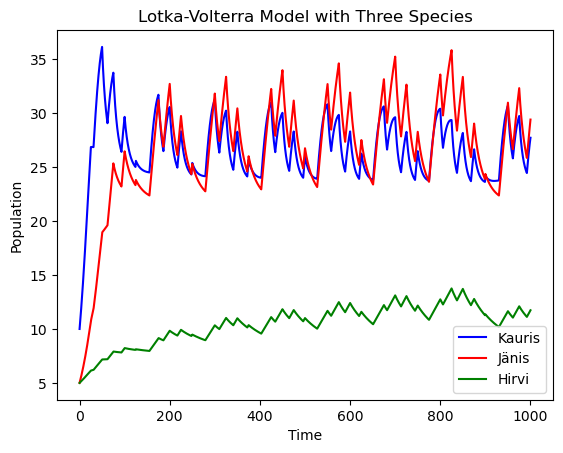

Kauriit: 27.719537926057168 Jänikset: 29.404413730705606 Hirvet: 11.73205795340909


In [7]:
# Säädetään hunting rate menemään automaattisesti lajin populaation mukaan.

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ODE system
def lotka_volterra_3species_hunt(N, r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32):
    N1, N2, N3 = N
    h1,h2,h3 = N1/1000,N2/1000,N3/1000 #Yksinkertaisesti, jaetaan se vain 1000
    dN1_dt = r1 * N1 * (1 - (N1 + alpha12 * N2 + alpha13 * N3) / (K - N1 - N2 - N3)) - d1 * N1 - h1 * N1
    dN2_dt = r2 * N2 * (1 - (N2 + beta21 * N1 + beta23 * N3) / (K - N1 - N2 - N3)) - d2 * N2 - h2 * N2
    dN3_dt = r3 * N3 * (1 - (N3 + gamma31 * N1 + gamma32 * N2) / (K - N1 - N2 - N3)) - d3 * N3 - h3 * N3
    return [dN1_dt, dN2_dt, dN3_dt]


def lotka_volterra_3species(N, r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32):
    N1, N2, N3 = N
    dN1_dt = r1 * N1 * (1 - (N1 + alpha12 * N2 + alpha13 * N3) / (K - N1 - N2 - N3)) - d1 * N1
    dN2_dt = r2 * N2 * (1 - (N2 + beta21 * N1 + beta23 * N3) / (K - N1 - N2 - N3)) - d2 * N2
    dN3_dt = r3 * N3 * (1 - (N3 + gamma31 * N1 + gamma32 * N2) / (K - N1 - N2 - N3)) - d3 * N3
    return [dN1_dt, dN2_dt, dN3_dt]

# Initial conditions
N1 = [10]
N2 = [5]
N3 = [5]

# Time
t = np.linspace(0, 1000, 10000)

# Params
K = 150 # Common carrying capacity
r1, r2, r3 = 0.12, 0.05, 0.01  # Growth rates
d1, d2, d3 = 0.06,0.015,0.001 # Death rates
K1, K2, K3 = 50, 40, 50      # Carrying capacities
alpha12, alpha13 = 0.1, 0.2  # Competition coefficients for species 1
beta21, beta23 = 0.1, 0.15    # Competition coefficients for species 2
gamma31, gamma32 = 0.1, 0.2  # Competition coefficients for species 3

# Solve
#sol = odeint(lotka_volterra_3species, N0, t, args=(r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32))
h = 0.1 # accuracy for euler
hunt_mode = False
for index in range(1,len(t)):
    
    
    x1,x2,x3 = N1[index-1],N2[index-1],N3[index-1]
    # Määritellään metsästys ajat
    if (index % 250 == 0):
        hunt_mode = True
    if (index % 310 == 0):
        hunt_mode = False
        
    if hunt_mode:
        xn1,xn2,xn3 = lotka_volterra_3species_hunt([x1,x2,x3], r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32)
    else:
        xn1,xn2,xn3 = lotka_volterra_3species([x1,x2,x3], r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32)


    
    # evaluate the next value of x and y using differentials
    next_N1 = N1[index-1] + xn1 * h
    next_N2 = N2[index-1] + xn2 * h
    next_N3 = N3[index-1] + xn3 * h

    N1.append(next_N1)
    N2.append(next_N2)
    N3.append(next_N3)

#N1, N2, N3 = sol.T
plt.plot(t, N1, 'b-', label='Kauris')
plt.plot(t, N2, 'r-', label='Jänis')
plt.plot(t, N3, 'g-', label='Hirvi')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc='best')
plt.title('Lotka-Volterra Model with Three Species')
plt.show()
print(f"Kauriit: {N1[-1]} Jänikset: {N2[-1]} Hirvet: {N3[-1]}")

Tulokset muuttuvat aika tasaiseksi. Eli tietynajan jälkeen luku pysyy tietyissä rajoissa.

Mitä jos metsästys aikaa nostetaan 120 päivään?

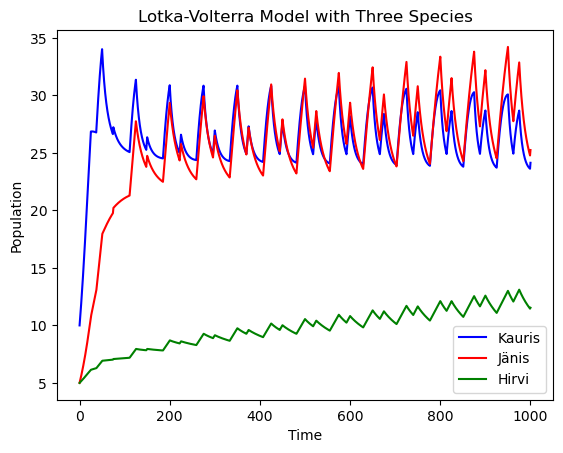

Kauriit: 24.13953392344709 Jänikset: 25.248144526324346 Hirvet: 11.536761969925973


In [8]:
# Säädetään hunting rate menemään automaattisesti lajin populaation mukaan.

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ODE system
def lotka_volterra_3species_hunt(N, r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32):
    N1, N2, N3 = N
    h1,h2,h3 = N1/1000,N2/1000,N3/1000 #Yksinkertaisesti, jaetaan se vain 1000
    dN1_dt = r1 * N1 * (1 - (N1 + alpha12 * N2 + alpha13 * N3) / (K - N1 - N2 - N3)) - d1 * N1 - h1 * N1
    dN2_dt = r2 * N2 * (1 - (N2 + beta21 * N1 + beta23 * N3) / (K - N1 - N2 - N3)) - d2 * N2 - h2 * N2
    dN3_dt = r3 * N3 * (1 - (N3 + gamma31 * N1 + gamma32 * N2) / (K - N1 - N2 - N3)) - d3 * N3 - h3 * N3
    return [dN1_dt, dN2_dt, dN3_dt]


def lotka_volterra_3species(N, r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32):
    N1, N2, N3 = N
    dN1_dt = r1 * N1 * (1 - (N1 + alpha12 * N2 + alpha13 * N3) / (K - N1 - N2 - N3)) - d1 * N1
    dN2_dt = r2 * N2 * (1 - (N2 + beta21 * N1 + beta23 * N3) / (K - N1 - N2 - N3)) - d2 * N2
    dN3_dt = r3 * N3 * (1 - (N3 + gamma31 * N1 + gamma32 * N2) / (K - N1 - N2 - N3)) - d3 * N3
    return [dN1_dt, dN2_dt, dN3_dt]

# Initial conditions
N1 = [10]
N2 = [5]
N3 = [5]

# Time
t = np.linspace(0, 1000, 10000)

# Params
K = 150 # Common carrying capacity
r1, r2, r3 = 0.12, 0.05, 0.01  # Growth rates
d1, d2, d3 = 0.06,0.015,0.001 # Death rates
K1, K2, K3 = 50, 40, 50      # Carrying capacities
alpha12, alpha13 = 0.1, 0.2  # Competition coefficients for species 1
beta21, beta23 = 0.1, 0.15    # Competition coefficients for species 2
gamma31, gamma32 = 0.1, 0.2  # Competition coefficients for species 3

# Solve
#sol = odeint(lotka_volterra_3species, N0, t, args=(r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32))
h = 0.1 # accuracy for euler
hunt_mode = False
for index in range(1,len(t)):
    
    
    x1,x2,x3 = N1[index-1],N2[index-1],N3[index-1]
    # Määritellään metsästys ajat
    if (index % 250 == 0):
        hunt_mode = True
    if (index % 370 == 0):
        hunt_mode = False
        
    if hunt_mode:
        xn1,xn2,xn3 = lotka_volterra_3species_hunt([x1,x2,x3], r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32)
    else:
        xn1,xn2,xn3 = lotka_volterra_3species([x1,x2,x3], r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32)


    
    # evaluate the next value of x and y using differentials
    next_N1 = N1[index-1] + xn1 * h
    next_N2 = N2[index-1] + xn2 * h
    next_N3 = N3[index-1] + xn3 * h

    N1.append(next_N1)
    N2.append(next_N2)
    N3.append(next_N3)

#N1, N2, N3 = sol.T
plt.plot(t, N1, 'b-', label='Kauris')
plt.plot(t, N2, 'r-', label='Jänis')
plt.plot(t, N3, 'g-', label='Hirvi')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc='best')
plt.title('Lotka-Volterra Model with Three Species')
plt.show()
print(f"Kauriit: {N1[-1]} Jänikset: {N2[-1]} Hirvet: {N3[-1]}")

Suurta muutosta ei ole havaittavasti, mutta toki lajien lukumäärät ovat paljon pienempiä.

## Predator prey

Kokeillaan seuraavaksi lisätä peto mukaan tähän. Joka on riippuvainen esimerkiksi jänis kannasta.

Ei oteta valmiiksi koodattua metsästys metodia ollenkaan mukaan tähän, vaan muutetaan "Hirvi" N3 pedoksi, joka on riippuvainen jäniskannasta

Joudutaan muokkaan aikapaljon alkuperäistä mallia.

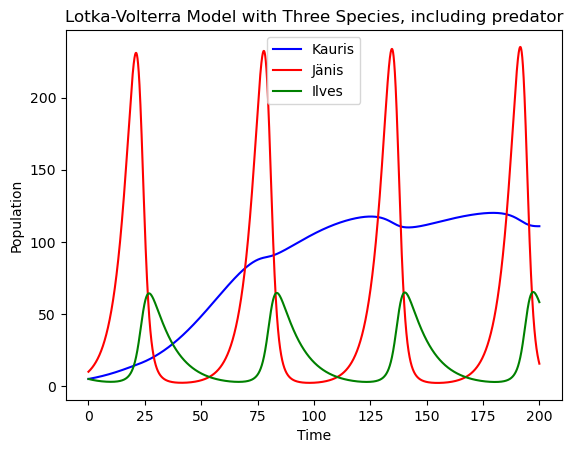

Kauriit: 110.85059334100397 Jänikset: 15.594337776619065 Ilves: 58.22673906296529


In [10]:
# Pedon lisäys

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ODE system
def lotka_volterra_3species_hunt(N, r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32):
    N1, N2, N3 = N
    h1,h2,h3 = N1/1000,N2/1000,N3/1000 #Yksinkertaisesti, jaetaan se vain 1000
    dN1_dt = r1 * N1 * (1 - (N1 + alpha12 * N2 + alpha13 * N3) / (K - N1 - N2 - N3)) - d1 * N1 - h1 * N1
    dN2_dt = r2 * N2 * (1 - (N2 + beta21 * N1 + beta23 * N3) / (K - N1 - N2 - N3)) - d2 * N2 - h2 * N2
    dN3_dt = r3 * N3 * (1 - (N3 + gamma31 * N1 + gamma32 * N2) / (K - N1 - N2 - N3)) - d3 * N3 - h3 * N3
    return [dN1_dt, dN2_dt, dN3_dt]



# Initial conditions
N1 = [5]
N2 = [10]
N3 = [5]

# Time
t = t = np.arange(0,200,h)

# Params
K = 250 # Common carrying capacity
r1, r2 = 0.12, 0.2  # Growth rates
d1, d2, d3 = 0.06,0.015,0.1 # Death rates
K1, K2, K3 = 50, 40, 50      # Carrying capacities
alpha12, alpha13 = 0.1, 0.2  # Competition coefficients for species 1
beta21, beta23 = 0.1, 0.15    # Competition coefficients for species 2
gamma31, gamma32 = 0.1, 0.2  # Competition coefficients for species 3

# Solve
#sol = odeint(lotka_volterra_3species, N0, t, args=(r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32))
r3 = 0.002 #Predators birth rate from eaten preys
b1 = 0.01 # Death rate due predatation

h = 0.01 # accuracy for euler
hunt_mode = False

def lotka_volterra_3species_predator(N, r1, r2, r3, K, d1,d3, b1, alpha12, alpha13):
    N1, N2, N3 = N
    dN1_dt = r1 * N1 * (1 - (N1 + alpha12 * N2 + alpha13 * N3)/K) - d1 * N1
    dN2_dt = r2*N2 - b1*N2*N3
    dN3_dt = r3 * N2 * N3 - d3*N3
    return [dN1_dt, dN2_dt, dN3_dt]

for index in range(1,len(t)):
    
    
    x1,x2,x3 = N1[index-1],N2[index-1],N3[index-1]
    # Määritellään metsästys ajat
    #if (index % 250 == 0):
    #    hunt_mode = True
    #if (index % 370 == 0):
    #    hunt_mode = False
        
    if hunt_mode:
        xn1,xn2,xn3 = lotka_volterra_3species_hunt([x1,x2,x3], r1, r2, r3, K, d1, d2, d3, alpha12, alpha13)
    else:
        xn1,xn2,xn3 = lotka_volterra_3species_predator([x1,x2,x3], r1, r2, r3, K, d1, d3, b1, alpha12, alpha13)


    
    next_N1 = N1[index-1] + xn1 * h
    next_N2 = N2[index-1] + xn2 * h
    next_N3 = N3[index-1] + xn3 * h

    N1.append(next_N1)
    N2.append(next_N2)
    N3.append(next_N3)

#N1, N2, N3 = sol.T
plt.plot(t, N1, 'b-', label='Kauris')
plt.plot(t, N2, 'r-', label='Jänis')
plt.plot(t, N3, 'g-', label='Ilves')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc='best')
plt.title('Lotka-Volterra Model with Three Species, including predator')
plt.show()
print(f"Kauriit: {N1[-1]} Jänikset: {N2[-1]} Ilves: {N3[-1]}")

Eli nyt on poistettu kantokyky, muokattu rajusti mallia, jotta voidaan saada "predator prey" yhtälö. Toisinsanoen, että pedot ja saaliit ovat riippuvaisia toisistaan.

Laitetaan seuraavaksi myös riippuvuudet N1 lajille.

Eli joudutaan säätämään hieman rateja

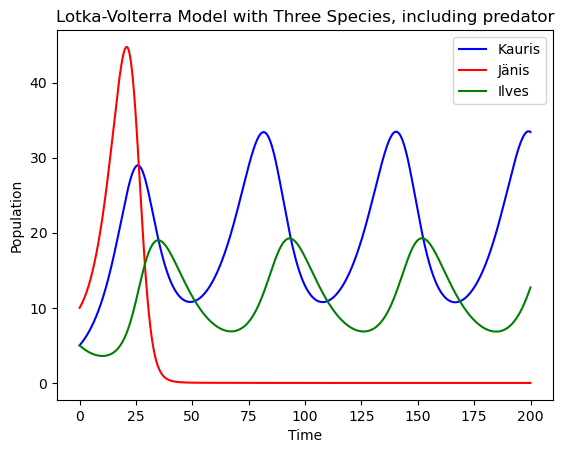

Kauriit: 33.40908445967746 Jänikset: 3.671849661842414e-11 Ilves: 12.709463512151892


In [11]:
# Pedon lisäys

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# ODE system
def lotka_volterra_3species_hunt(N, r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32):
    N1, N2, N3 = N
    h1,h2,h3 = N1/1000,N2/1000,N3/1000 #Yksinkertaisesti, jaetaan se vain 1000
    dN1_dt = r1 * N1 * (1 - (N1 + alpha12 * N2 + alpha13 * N3) / (K - N1 - N2 - N3)) - d1 * N1 - h1 * N1
    dN2_dt = r2 * N2 * (1 - (N2 + beta21 * N1 + beta23 * N3) / (K - N1 - N2 - N3)) - d2 * N2 - h2 * N2
    dN3_dt = r3 * N3 * (1 - (N3 + gamma31 * N1 + gamma32 * N2) / (K - N1 - N2 - N3)) - d3 * N3 - h3 * N3
    return [dN1_dt, dN2_dt, dN3_dt]



# Initial conditions
N1 = [5]
N2 = [10]
N3 = [5]

# Time
t = t = np.arange(0,200,h)

# Params
K = 250 # Common carrying capacity
r1, r2 = 0.12, 0.2  # Growth rates
d1, d2, d3 = 0.06,0.015,0.1 # Death rates
K1, K2, K3 = 50, 40, 50      # Carrying capacities
alpha12, alpha13 = 0.1, 0.2  # Competition coefficients for species 1
beta21, beta23 = 0.1, 0.15    # Competition coefficients for species 2
gamma31, gamma32 = 0.1, 0.2  # Competition coefficients for species 3

# Solve
#sol = odeint(lotka_volterra_3species, N0, t, args=(r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32))
r3 = 0.002 #Predators birth rate from eaten preys
b1 = 0.01 # Death rate due predatation
b2 = 0.03 # Deer's death rate due predatation
r3_b = 0.005 #Predators birth rate from deers
h = 0.01 # accuracy for euler
hunt_mode = False

def lotka_volterra_3species_predator(N, r1, r2, r3,r3_b, K, d1, d2, d3, b1,b2, alpha12, alpha13):
    N1, N2, N3 = N
    dN1_dt = r1*N1 - b1*N1*N3
    dN2_dt = r2*N2 - b2*N2*N3
    dN3_dt = r3 * N2 * N3 + r3_b*N1*N3 - d3*N3
    return [dN1_dt, dN2_dt, dN3_dt]

for index in range(1,len(t)):
    
    
    x1,x2,x3 = N1[index-1],N2[index-1],N3[index-1]
    # Määritellään metsästys ajat
    #if (index % 250 == 0):
    #    hunt_mode = True
    #if (index % 370 == 0):
    #    hunt_mode = False
        
    if hunt_mode:
        xn1,xn2,xn3 = lotka_volterra_3species_hunt([x1,x2,x3], r1, r2, r3, K, d1, d2, d3, alpha12, alpha13)
    else:
        xn1,xn2,xn3 = lotka_volterra_3species_predator([x1,x2,x3], r1, r2, r3,r3_b, K, d1, d2, d3, b1,b2, alpha12, alpha13)


    
    next_N1 = N1[index-1] + xn1 * h
    next_N2 = N2[index-1] + xn2 * h
    next_N3 = N3[index-1] + xn3 * h

    N1.append(next_N1)
    N2.append(next_N2)
    N3.append(next_N3)

#N1, N2, N3 = sol.T
plt.plot(t, N1, 'b-', label='Kauris')
plt.plot(t, N2, 'r-', label='Jänis')
plt.plot(t, N3, 'g-', label='Ilves')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc='best')
plt.title('Lotka-Volterra Model with Three Species, including predator')
plt.show()
print(f"Kauriit: {N1[-1]} Jänikset: {N2[-1]} Ilves: {N3[-1]}")

Voidaan heti huomata, että peto syö heikomman saaliseläimen lähes heti sukupuuttoon.

Mitä jos tähän lisätään pedon metsästys?

Koska muutettiin jo aikasemmin aikaa erilaiseksi, vähennetään metsästys päivät 10 päivään, jotka tapahtuvat 20 päivän välein.

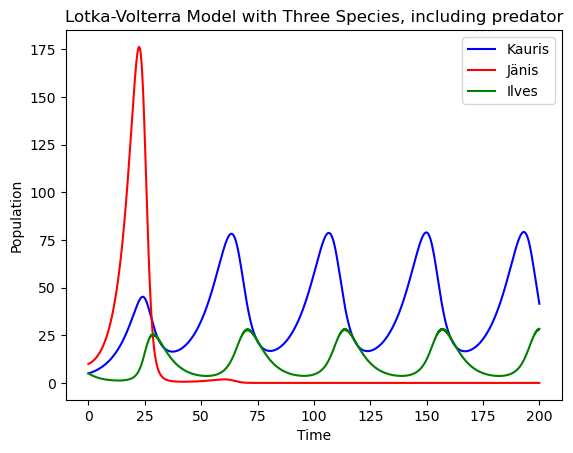

Kauriit: 41.541168707307584 Jänikset: 6.87108456342897e-11 Ilves: 28.406449823396542


In [12]:
# Pedon metsästyksen lisäys

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt



# Initial conditions
N1 = [5]
N2 = [10]
N3 = [5]

# Time
t = t = np.arange(0,200,h)

# Params
K = 250 # Common carrying capacity
r1, r2 = 0.12, 0.2  # Growth rates
d1, d2, d3 = 0.06,0.015,0.1 # Death rates
K1, K2, K3 = 50, 40, 50      # Carrying capacities
alpha12, alpha13 = 0.1, 0.2  # Competition coefficients for species 1
beta21, beta23 = 0.1, 0.15    # Competition coefficients for species 2
gamma31, gamma32 = 0.1, 0.2  # Competition coefficients for species 3

# Solve
#sol = odeint(lotka_volterra_3species, N0, t, args=(r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32))
r3 = 0.002 #Predators birth rate from eaten preys
b1 = 0.01 # Death rate due predatation
b2 = 0.03 # Deer's death rate due predatation
r3_b = 0.005 #Predators birth rate from deers
h = 0.01 # accuracy for euler
hunt_mode = False

def lotka_volterra_3species_hunt(N, r1, r2, r3,r3_b, d3, b1,b2):
    N1, N2, N3 = N
    h1 = 0.2 #Hunting rate for predator
    N1, N2, N3 = N
    dN1_dt = r1*N1 - b1*N1*N3
    dN2_dt = r2*N2 - b2*N2*N3
    dN3_dt = r3 * N2 * N3 + r3_b*N1*N3 - (d3*N3 + h1*N3)
    return [dN1_dt, dN2_dt, dN3_dt]

def lotka_volterra_3species_predator(N, r1, r2, r3,r3_b, d3, b1,b2):
    N1, N2, N3 = N
    dN1_dt = r1*N1 - b1*N1*N3
    dN2_dt = r2*N2 - b2*N2*N3
    dN3_dt = r3 * N2 * N3 + r3_b*N1*N3 - d3*N3
    return [dN1_dt, dN2_dt, dN3_dt]

for index in range(1,len(t)):
    
    
    x1,x2,x3 = N1[index-1],N2[index-1],N3[index-1]
    # Määritellään metsästys ajat
    if (index % 20 == 0):
        hunt_mode = True
    if (index % 30 == 0):
        hunt_mode = False
        
    if hunt_mode:
        xn1,xn2,xn3 = lotka_volterra_3species_hunt([x1,x2,x3], r1, r2, r3,r3_b, d3, b1,b2)
    else:
        xn1,xn2,xn3 = lotka_volterra_3species_predator([x1,x2,x3], r1, r2, r3,r3_b, d3, b1,b2)


    
    next_N1 = N1[index-1] + xn1 * h
    next_N2 = N2[index-1] + xn2 * h
    next_N3 = N3[index-1] + xn3 * h

    N1.append(next_N1)
    N2.append(next_N2)
    N3.append(next_N3)

#N1, N2, N3 = sol.T
plt.plot(t, N1, 'b-', label='Kauris')
plt.plot(t, N2, 'r-', label='Jänis')
plt.plot(t, N3, 'g-', label='Ilves')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc='best')
plt.title('Lotka-Volterra Model with Three Species, including predator')
plt.show()
print(f"Kauriit: {N1[-1]} Jänikset: {N2[-1]} Ilves: {N3[-1]}")

Huomataan, että metsästys vaikuttaa positiivisesti kaikkiin eläinlajeihin.

Voiko tätä jo käyttää puolustamaan metsästyksen hyötyjä? Ehkä ei, mutta mielenkiintoinen havainto kyllä.

Todellakin on mahdollista, että tässä on virhe.

Huomataan myös, että tähän vaikuttaa kovasti alkuarvot. Eli lajien alkuperäiset koot.

Eri alkuarvoilla tulee erilaisia tuloksia.

Lisätään seuraavaksi satunnaisuus jokaiseen lajiin.

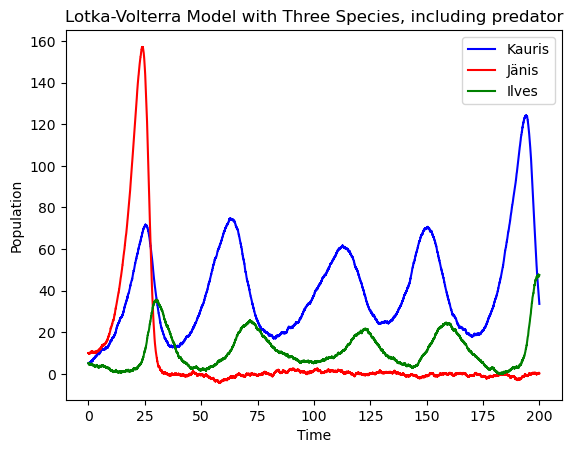

Kauriit: 33.639987385267574 Jänikset: 0.3094681662547842 Ilves: 47.51745836437785


In [13]:
#Satunnaisuus

import numpy as np
from scipy.integrate import odeint
import random
import matplotlib.pyplot as plt

def stochastic_term(amp):
    return (amp * random.uniform(-1,1))

amp = 0.1

# Initial conditions
N1 = [5]
N2 = [10]
N3 = [5]

# Time
t = t = np.arange(0,200,h)

# Params
K = 250 # Common carrying capacity
r1, r2 = 0.12, 0.2  # Growth rates
d1, d2, d3 = 0.06,0.015,0.1 # Death rates
K1, K2, K3 = 50, 40, 50      # Carrying capacities
alpha12, alpha13 = 0.1, 0.2  # Competition coefficients for species 1
beta21, beta23 = 0.1, 0.15    # Competition coefficients for species 2
gamma31, gamma32 = 0.1, 0.2  # Competition coefficients for species 3

# Solve
#sol = odeint(lotka_volterra_3species, N0, t, args=(r1, r2, r3, K, d1, d2, d3, alpha12, alpha13, beta21, beta23, gamma31, gamma32))
r3 = 0.002 #Predators birth rate from eaten preys
b1 = 0.01 # Death rate due predatation
b2 = 0.03 # Deer's death rate due predatation
r3_b = 0.005 #Predators birth rate from deers
h = 0.01 # accuracy for euler
hunt_mode = False

def lotka_volterra_3species_hunt(N, r1, r2, r3,r3_b, K, d3, b1,b2):
    N1, N2, N3 = N
    h1 = 0.2 #Hunting rate for predator
    N1, N2, N3 = N
    dN1_dt = r1*N1 - b1*N1*N3
    dN2_dt = r2*N2 - b2*N2*N3
    dN3_dt = r3 * N2 * N3 + r3_b*N1*N3 - (d3*N3 + h1*N3)
    return [dN1_dt, dN2_dt, dN3_dt]

def lotka_volterra_3species_predator(N, r1, r2, r3,r3_b, d3, b1,b2):
    N1, N2, N3 = N
    dN1_dt = r1*N1 - b1*N1*N3
    dN2_dt = r2*N2 - b2*N2*N3
    dN3_dt = r3 * N2 * N3 + r3_b*N1*N3 - d3*N3
    return [dN1_dt, dN2_dt, dN3_dt]

for index in range(1,len(t)):
    
    
    x1,x2,x3 = N1[index-1],N2[index-1],N3[index-1]
    # Määritellään metsästys ajat
    if (index % 20 == 0):
        hunt_mode = True
    if (index % 30 == 0):
        hunt_mode = False
        
    if hunt_mode:
        xn1,xn2,xn3 = lotka_volterra_3species_hunt([x1,x2,x3], r1, r2, r3,r3_b, K, d3, b1,b2)
    else:
        xn1,xn2,xn3 = lotka_volterra_3species_predator([x1,x2,x3], r1, r2, r3,r3_b, d3, b1,b2)

    next_N1 = N1[index-1] + xn1 * h
    next_N2 = N2[index-1] + xn2 * h
    next_N3 = N3[index-1] + xn3 * h

    N1.append(next_N1 + stochastic_term(amp))
    N2.append(next_N2 + stochastic_term(amp))
    N3.append(next_N3 + stochastic_term(amp))

#N1, N2, N3 = sol.T
plt.plot(t, N1, 'b-', label='Kauris')
plt.plot(t, N2, 'r-', label='Jänis')
plt.plot(t, N3, 'g-', label='Ilves')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend(loc='best')
plt.title('Lotka-Volterra Model with Three Species, including predator')
plt.show()
print(f"Kauriit: {N1[-1]} Jänikset: {N2[-1]} Ilves: {N3[-1]}")

Nämä muuttuvat heti paljon "realistisemmiksi", koska satunnaisuus on mukana arjessa. Tähänhän voi vaikuttaa sääolosuhteet, sekä muut satunnaismuuttujat.

Muuttamalla amp parametria, saadaan erilaisia tuloksia ja skenaarioita. Joissain tapauksissa kaikki vain kuolevat sukupuuttoon.
